In [1]:
import numpy as np
from math import sqrt
from pprint import pprint
from sklearn import datasets, linear_model, metrics
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate, KFold, cross_val_predict, train_test_split, cross_val_score
from sklearn import preprocessing
from sklearn.metrics import make_scorer, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate

In [2]:
# cargar el dataset
# C:Users\plane\OneDrive\Escritorio\COMPUTING SCIENCE\MASTER Inteligencia artificial\05_Aprendizaje_supervisado

import os
import pandas as pd

path = '../data/BostonHousing.csv'

data = pd.read_csv(path, sep= ',' )


This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was obtained from the StatLib archive (http://lib.stat.cmu.edu/datasets/boston), and has been used extensively throughout the literature to benchmark algorithms. However, these comparisons were primarily done outside of Delve and are thus somewhat suspect. The dataset is small in size with only 506 cases.

The data was originally published by Harrison, D. and Rubinfeld, D.L. `Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.
Dataset Naming

The name for this dataset is simply boston. It has two prototasks: nox, in which the nitrous oxide level is to be predicted; and price, in which the median value of a home is to be predicted

Miscellaneous Details

-Origin
    The origin of the boston housing data is Natural.
-Usage
    This dataset may be used for Assessment.
-Number of Cases
    The dataset contains a total of 506 cases.
-Order
    The order of the cases is mysterious.
-Variables
    There are 14 attributes in each case of the dataset. They are:

        CRIM - per capita crime rate by town
        ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
        INDUS - proportion of non-retail business acres per town.
        CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
        NOX - nitric oxides concentration (parts per 10 million)
        RM - average number of rooms per dwelling
        AGE - proportion of owner-occupied units built prior to 1940
        DIS - weighted distances to five Boston employment centres
        RAD - index of accessibility to radial highways
        TAX - full-value property-tax rate per $10,000
        PTRATIO - pupil-teacher ratio by town
        B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        LSTAT - % lower status of the population
        MEDV - Median value of owner-occupied homes in $1000's

-Note
    Variable #14 seems to be censored at 50.00 (corresponding to a median price of $50,000); Censoring is suggested by the fact that the highest median price of exactly $50,000 is reported in 16 cases, while 15 cases have prices between $40,000 and $50,000, with prices rounded to the nearest hundred. Harrison and Rubinfeld do not mention any censoring.

In [3]:
print(data.shape)
data.sample(5)

(506, 14)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
94,0.04294,28.0,15.04,0,0.464,6.249,77.3,3.6150,4,270,18.2,396.90,10.59,20.6
194,0.01439,60.0,2.93,0,0.401,6.604,18.8,6.2196,1,265,15.6,376.70,4.38,29.1
490,0.20746,0.0,27.74,0,0.609,5.093,98.0,1.8226,4,711,20.1,318.43,29.68,8.1
235,0.33045,0.0,6.20,0,0.507,6.086,61.5,3.6519,8,307,17.4,376.75,10.88,24.0
163,1.51902,0.0,19.58,1,0.605,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0


In [4]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


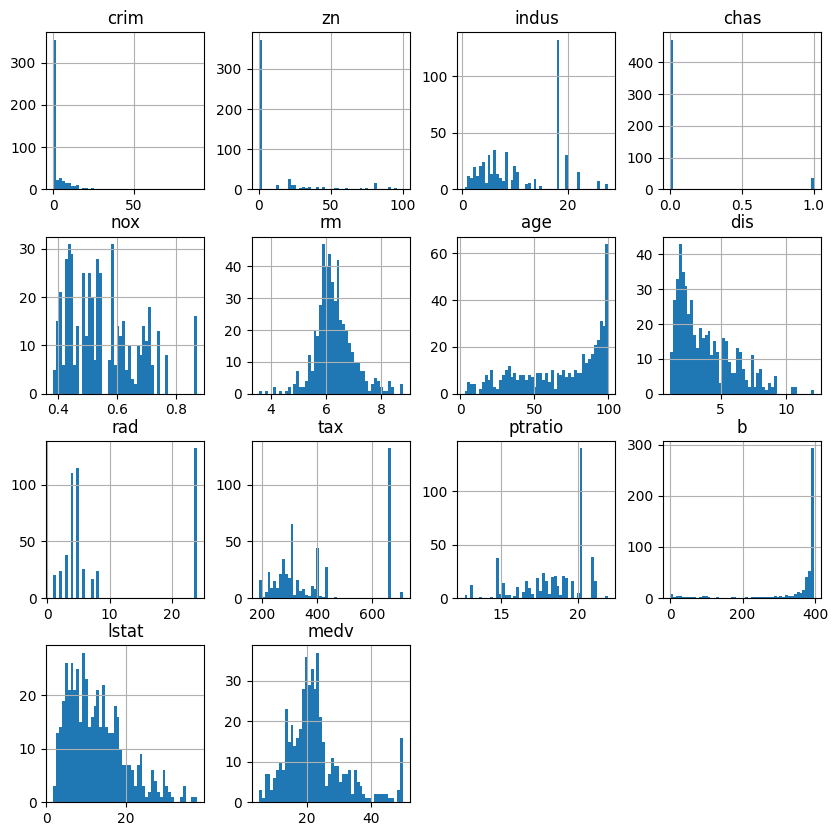

In [5]:
data.hist(bins= 50, 
          figsize= (10, 10),
          grid= True,
          )
plt.title('quick view of the data')
plt.show()

In [6]:
X = data.drop('medv', axis= 1)
y = data['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle= True, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [7]:
# escaladod de los datos

In [8]:
scaler = preprocessing.StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
metricas = {
  'MAE': 'neg_mean_absolute_error',
  'RMSE': make_scorer(lambda y, y_pred:
                      sqrt(mean_squared_error(y, y_pred)),
                      greater_is_better=False),
  'MAPE': make_scorer(lambda y, y_pred:
                      np.mean(np.abs((y - y_pred) / y)) * 100,
                      greater_is_better=False),
  'R2': 'r2'}

In [10]:
model = linear_model.LinearRegression(fit_intercept=True)

In [11]:
results = cross_validate(estimator= model,
                          X= X_train, y= y_train,
                          cv= KFold(n_splits= 5, shuffle= True, random_state= 42),
                          scoring= metricas,
                          n_jobs= -1)

In [12]:
for metric, array in results.items():
    print(f'Para la métrica \t{metric}, \t se obtiene un resultado promedio de: \t{array} ---> {round(array.mean(), 2)}')

Para la métrica 	fit_time, 	 se obtiene un resultado promedio de: 	[0.0098629  0.00235748 0.01403761 0.01603222 0.00435185] ---> 0.01
Para la métrica 	score_time, 	 se obtiene un resultado promedio de: 	[0.00422287 0.00422287 0.00422287 0.00422287 0.00422287] ---> 0.0
Para la métrica 	test_MAE, 	 se obtiene un resultado promedio de: 	[-3.21076048 -3.49646957 -3.77356487 -3.92171483 -2.73953332] ---> -3.43
Para la métrica 	test_RMSE, 	 se obtiene un resultado promedio de: 	[-4.82560235 -4.85434331 -6.03941383 -5.07501498 -3.5370237 ] ---> -4.87
Para la métrica 	test_MAPE, 	 se obtiene un resultado promedio de: 	[-16.11181729 -16.67498664 -16.99058036 -18.78184408 -16.5622129 ] ---> -17.02
Para la métrica 	test_R2, 	 se obtiene un resultado promedio de: 	[0.6724828  0.76007223 0.58945002 0.75917498 0.81121207] ---> 0.72


In [13]:
model.fit(X_train, y_train)

#print('las features son {}'.format(model.))
print('los coeficientes son: {}'.format(model.coef_))
print('\nel bias es : {}'.format(model.intercept_))

los coeficientes son: [-1.00213533  0.69626862  0.27806485  0.7187384  -2.0223194   3.14523956
 -0.17604788 -3.0819076   2.25140666 -1.76701378 -2.03775151  1.12956831
 -3.61165842]

el bias es : 22.796534653465343


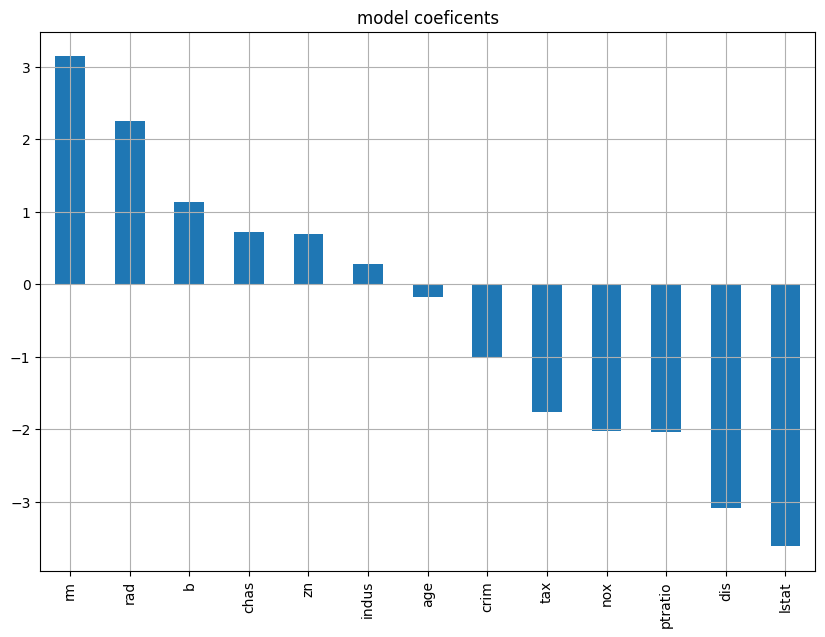

In [14]:
pd.Series(model.coef_, index= data.drop('medv', axis= 1).columns).sort_values(ascending=False).plot(kind= 'bar', figsize= (10, 7), grid= True)
plt.title('model coeficents')
plt.show()

In [15]:
# predicion 

y_pred_test = model.predict(X_test)

In [16]:
mean_squared_error(y_pred_test, y_test)

24.291119474973517

In [17]:
MAE = metrics.mean_absolute_error(y_test, y_pred_test)
MSE = metrics.mean_squared_error(y_test, y_pred_test, squared=True)
RMSE = metrics.mean_squared_error(y_test, y_pred_test, squared=False)
MAPE = metrics.mean_absolute_percentage_error(y_test, y_pred_test)
R2 = metrics.r2_score(y_test, y_pred_test)

print('MAE:  %.4f' % MAE)
print('MSE: %.4f' % MSE)
print('RMSE: %.4f' % RMSE)
print('MAPE: %.4f' % MAPE)
print('R2:   %.4f' % R2)

MAE:  3.1891
MSE: 24.2911
RMSE: 4.9286
MAPE: 0.1687
R2:   0.6688


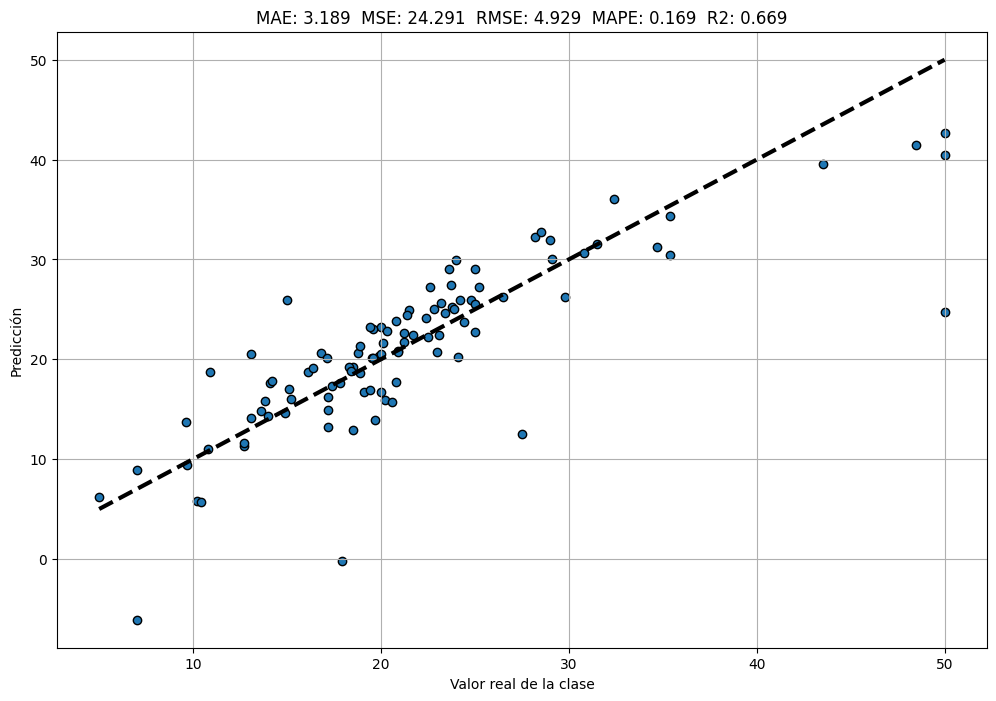

In [18]:
# Gráfica de realidad vs. predicción.
fig, ax = plt.subplots()
fig.set_size_inches(12,8)

ax.scatter(y_test, y_pred_test, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)

ax.set_xlabel('Valor real de la clase')
ax.set_ylabel('Predicción')
plt.title("MAE: %.3f  MSE: %.3f  RMSE: %.3f  MAPE: %.3f  R2: %.3f" %
          (MAE,MSE,RMSE,MAPE,R2))
plt.grid()
plt.show()

In [19]:
# regularización

ridge = linear_model.Ridge(fit_intercept= True)

In [20]:
GS_ridge = GridSearchCV(estimator = ridge,
                        param_grid={'alpha' : [0.01, 0.1, 1, 10, 100]},
                        scoring='r2',
                        cv= KFold(n_splits=5, shuffle=True, random_state=42),
                        n_jobs= -1)

In [21]:
GS_ridge.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]}, scoring='r2')

In [22]:
best_ridge = GS_ridge.best_estimator_
best_ridge

Ridge(alpha=10)

In [23]:
GS_ridge.best_score_

0.7188323829790603

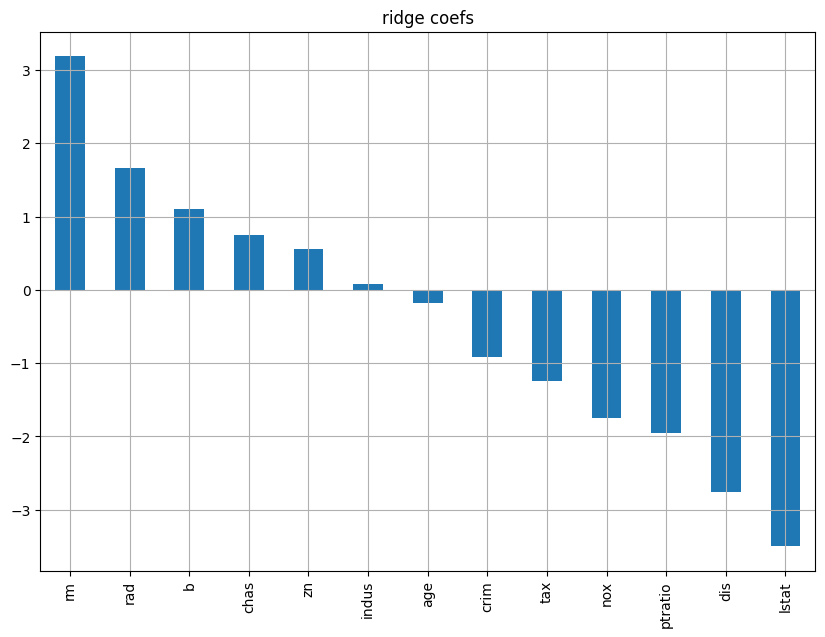

In [24]:
pd.Series(best_ridge.coef_, index= data.drop('medv', axis= 1).columns).sort_values(ascending= False).plot(kind= 'bar', figsize= (10,7), grid= True)
plt.title('ridge coefs')
plt.show()

In [25]:
y_pred_ridge = best_ridge.predict(X_test)

In [26]:
MAE = metrics.mean_absolute_error(y_test, y_pred_ridge)
MSE = metrics.mean_squared_error(y_test, y_pred_ridge, squared=True)
RMSE = metrics.mean_squared_error(y_test, y_pred_ridge, squared=False)
MAPE = metrics.mean_absolute_percentage_error(y_test, y_pred_ridge)
R2 = metrics.r2_score(y_test, y_pred_ridge)

print('MAE:  %.4f' % MAE)
print('MSE: %.4f' % MSE)
print('RMSE: %.4f' % RMSE)
print('MAPE: %.4f' % MAPE)
print('R2:   %.4f' % R2)

MAE:  3.1723
MSE: 24.4958
RMSE: 4.9493
MAPE: 0.1680
R2:   0.6660


In [27]:
# lasso

lasso = linear_model.Lasso(fit_intercept= True)

GS_lasso = GridSearchCV(estimator=lasso,
                        param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
                        scoring= 'r2',
                        cv = KFold(n_splits=5, shuffle= True, random_state=42),
                        n_jobs= -1)

GS_lasso.fit(X_train, y_train)

best_lasso = GS_lasso.best_estimator_

In [28]:
best_lasso

Lasso(alpha=0.01)

In [29]:
GS_lasso.best_score_

0.7185396741483936

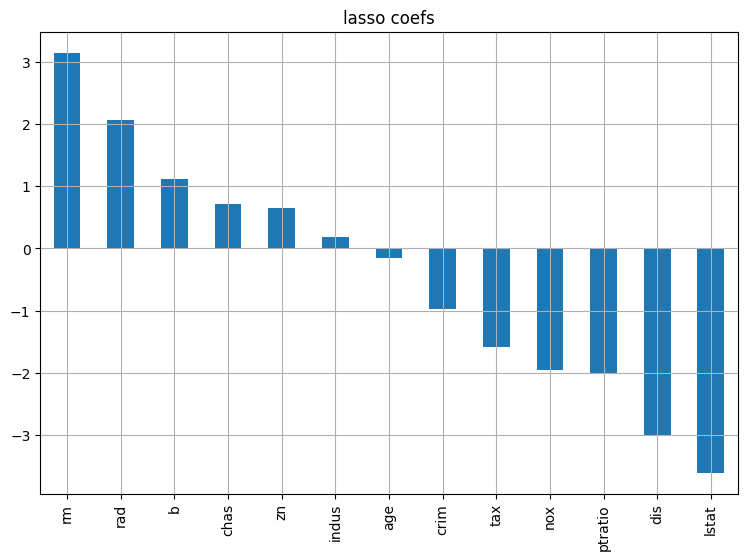

In [30]:
pd.Series(best_lasso.coef_, index= data.drop('medv', axis= 1).columns).sort_values(ascending= False).plot(kind= 'bar', grid= True, figsize= (9,6))
plt.title('lasso coefs')
plt.show()

In [31]:
y_pred_lasso = best_lasso.predict(X_test)

In [32]:
MAE = metrics.mean_absolute_error(y_test, y_pred_lasso)
MSE = metrics.mean_squared_error(y_test, y_pred_lasso, squared=True)
RMSE = metrics.mean_squared_error(y_test, y_pred_lasso, squared=False)
MAPE = metrics.mean_absolute_percentage_error(y_test, y_pred_lasso)
R2 = metrics.r2_score(y_test, y_pred_lasso)

print('MAE:  %.4f' % MAE)
print('MSE: %.4f' % MSE)
print('RMSE: %.4f' % RMSE)
print('MAPE: %.4f' % MAPE)
print('R2:   %.4f' % R2)

MAE:  3.1812
MSE: 24.3335
RMSE: 4.9329
MAPE: 0.1684
R2:   0.6682


In [37]:
elastic = linear_model.ElasticNet(fit_intercept=True)
h_params = {'alpha': [0.01, 0.1, 1, 10, 100],
            'l1_ratio': [0, 0.25, 0.5, 0.75]}

GS_elas = GridSearchCV(estimator=elastic,
                       param_grid=h_params,
                       scoring='r2',
                       cv= KFold(n_splits=5, shuffle=True, random_state=42),
                       n_jobs= -1)

GS_elas.fit(X_train, y_train)

c:\Users\plane\OneDrive\Escritorio\COMPUTING SCIENCE\MASTER Inteligencia artificial\05_Aprendizaje_supervisado\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.473e+03, tolerance: 3.510e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0, 0.25, 0.5, 0.75]},
             scoring='r2')

In [34]:
best_elas = GS_elas.best_estimator_
best_elas

ElasticNet(alpha=0.01, l1_ratio=0.25)

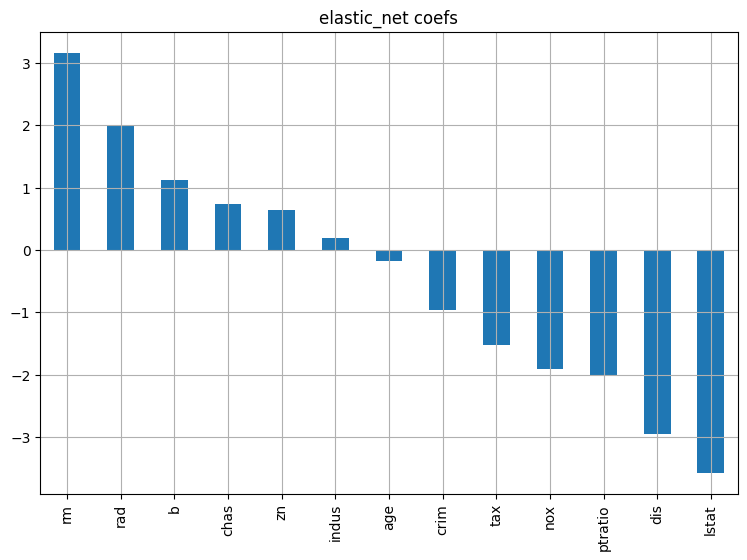

In [35]:
pd.Series(best_elas.coef_, index= data.drop('medv', axis= 1).columns).sort_values(ascending=False).plot(kind= 'bar', grid= True, figsize= (9,6))
plt.title('elastic_net coefs')
plt.show()

In [36]:
y_pred_elas = best_elas.predict(X_test)

MAE = metrics.mean_absolute_error(y_test, y_pred_elas)
MSE = metrics.mean_squared_error(y_test, y_pred_elas, squared=True)
RMSE = metrics.mean_squared_error(y_test, y_pred_elas, squared=False)
MAPE = metrics.mean_absolute_percentage_error(y_test, y_pred_elas)
R2 = metrics.r2_score(y_test, y_pred_elas)

print('MAE:  %.4f' % MAE)
print('MSE: %.4f' % MSE)
print('RMSE: %.4f' % RMSE)
print('MAPE: %.4f' % MAPE)
print('R2:   %.4f' % R2)

MAE:  3.1799
MSE: 24.3682
RMSE: 4.9364
MAPE: 0.1683
R2:   0.6677
